### Import the necessary libraries

In [85]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
import emoji
import re
from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, ConfusionMatrixDisplay

### Read the file

In [86]:
df = pd.read_csv("E:\\apple reviews.csv")

### Data Preprocessing and EDA

In [87]:
df.head()

,text,sentiment
0,Wow. Yall needa step it up @Apple RT @heynyla:...,-1
1,What Happened To Apple Inc? http://t.co/FJEX...,0
2,Thank u @apple I can now compile all of the pi...,1
3,The oddly uplifting story of the Apple co-foun...,0
4,@apple can i exchange my iphone for a differen...,0


In [88]:
df.tail()

,text,sentiment
1625,Those** PICK UP THE SLACK YOU FUCK BOYS @Apple,-1
1626,Finally got my iPhone 6 in the mail and it com...,-1
1627,@umo_games @Apple ended up getting a new compu...,0
1628,The 19-Year-Old #WizKid Who Turned Down @Apple...,0
1629,The iPhone 6 May Have A Longer Upgrade Cycle -...,-1


In [89]:
## renaming labels in the 'sentiment' column
label_mapping = {-1: 'NEGATIVE', 1: 'POSITIVE', 0: 'NEUTRAL'}

df['sentiment'] = df['sentiment'].replace(label_mapping)

In [90]:
df.head()

,text,sentiment
0,Wow. Yall needa step it up @Apple RT @heynyla:...,NEGATIVE
1,What Happened To Apple Inc? http://t.co/FJEX...,NEUTRAL
2,Thank u @apple I can now compile all of the pi...,POSITIVE
3,The oddly uplifting story of the Apple co-foun...,NEUTRAL
4,@apple can i exchange my iphone for a differen...,NEUTRAL


In [91]:
## Identify the missing values
df.isnull().sum()

text         0
sentiment    0
dtype: int64

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1630 entries, 0 to 1629
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       1630 non-null   object
 1   sentiment  1630 non-null   object
dtypes: object(2)
memory usage: 25.6+ KB


In [93]:
df['sentiment'].value_counts()

sentiment
NEUTRAL     801
NEGATIVE    686
POSITIVE    143
Name: count, dtype: int64

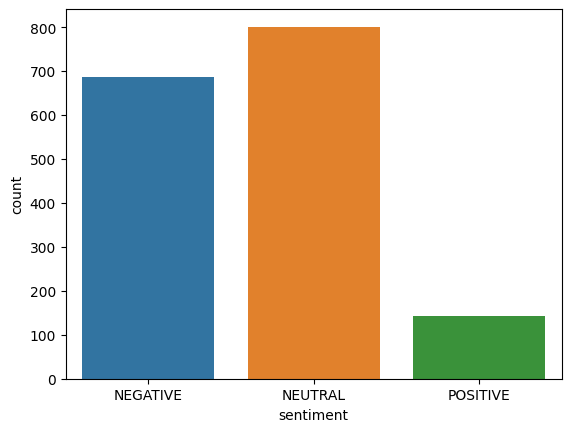

In [94]:
sns.countplot(x=df['sentiment'])
plt.show()

### Text Preprocessing

In [95]:
# Convert into Lowercase
df['text'] = df['text'].apply(lambda x : x.lower())
df.head()

,text,sentiment
0,wow. yall needa step it up @apple rt @heynyla:...,NEGATIVE
1,what happened to apple inc? http://t.co/fjex...,NEUTRAL
2,thank u @apple i can now compile all of the pi...,POSITIVE
3,the oddly uplifting story of the apple co-foun...,NEUTRAL
4,@apple can i exchange my iphone for a differen...,NEUTRAL


In [96]:
# removing punctuation marks-1
df["text"] = df["text"].apply(lambda x: re.sub(r"[.,;:!\?\"'`]", "", x))

# removing punctuation marks-2
df["text"] = df["text"].apply(lambda x: re.sub(r"[@#\$%^&*\(\)\\/\+-_=\[\]\{\}<>u^]", "", x))

# removing unnecessary characters
df["text"] = df["text"].apply(lambda x: re.sub(r"½m|½s|½t|½ï", "", x))

df.head(20)

,text,sentiment
0,wow yall needa step it p apple rt heynyla msic...,NEGATIVE
1,what happened to apple inc httptcofjexiop a...,NEUTRAL
2,thank apple i can now compile all of the pics...,POSITIVE
3,the oddly plifting story of the apple cofonder...,NEUTRAL
4,apple can i exchange my iphone for a different...,NEUTRAL
5,rt jpdesloges apple acted nfairly in sppressin...,NEGATIVE
6,lets not forget that press effects stock apple...,NEUTRAL
7,apple inc deleted songs from rival services fr...,NEGATIVE
8,teamcavto apple theyre staging a die in ar an ...,NEUTRAL
9,happy monday my camera on my fancy apple iphon...,NEGATIVE


In [97]:
# Remove emojis
df["text"] = df["text"].apply(lambda x: emoji.demojize(x))
# Remove emoji codes
df["text"] = df["text"].apply(lambda x: re.sub(r'\ :.*?:', '', x))

In [98]:
# Remove Stpwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [99]:
stop = stopwords.words('english')
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [100]:
#tokenize and remove stop words
df['text'].apply(lambda x: [word for word in x.split() if word not in stop])

0       [wow, yall, needa, step, p, apple, rt, heynyla...
1       [happened, apple, inc, httptcofjexiop, aapl, a...
2       [thank, apple, compile, pics, commnicate, one,...
3       [oddly, plifting, story, apple, cofonder, sold...
4       [apple, exchange, iphone, different, color, lm...
                              ...                        
1625               [pick, p, slack, yo, fck, boys, apple]
1626    [finally, got, iphone, mail, comes, ot, box, b...
1627    [mogames, apple, ended, p, getting, new, compt...
1628    [yearold, wizkid, trned, apple, nabbed, backin...
1629    [iphone, may, longer, pgrade, cycle, expect, n...
Name: text, Length: 1630, dtype: object

In [101]:
# Join the words back
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df.head()

,text,sentiment
0,wow yall needa step p apple rt heynyla msic sn...,NEGATIVE
1,happened apple inc httptcofjexiop aapl apple m...,NEUTRAL
2,thank apple compile pics commnicate one place ...,POSITIVE
3,oddly plifting story apple cofonder sold stake...,NEUTRAL
4,apple exchange iphone different color lmao cha...,NEUTRAL


In [102]:
nltk.download('wordnet')
nltk.download('wordnet2022')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet2022 to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet2022 is already up-to-date!


True

In [103]:
wordnet = WordNetLemmatizer()

In [104]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [105]:
# Lemmatization
df['text'] = df['text'].apply(lambda x : wordnet.lemmatize(x))
df.head(30)

,text,sentiment
0,wow yall needa step p apple rt heynyla msic sn...,NEGATIVE
1,happened apple inc httptcofjexiop aapl apple m...,NEUTRAL
2,thank apple compile pics commnicate one place ...,POSITIVE
3,oddly plifting story apple cofonder sold stake...,NEUTRAL
4,apple exchange iphone different color lmao cha...,NEUTRAL
5,rt jpdesloges apple acted nfairly sppressing d...,NEGATIVE
6,lets forget press effects stock apple defend i...,NEUTRAL
7,apple inc deleted songs rival services ipods h...,NEGATIVE
8,teamcavto apple theyre staging die ar apple st...,NEUTRAL
9,happy monday camera fancy apple iphonepls sdde...,NEGATIVE


### Analysing the Data

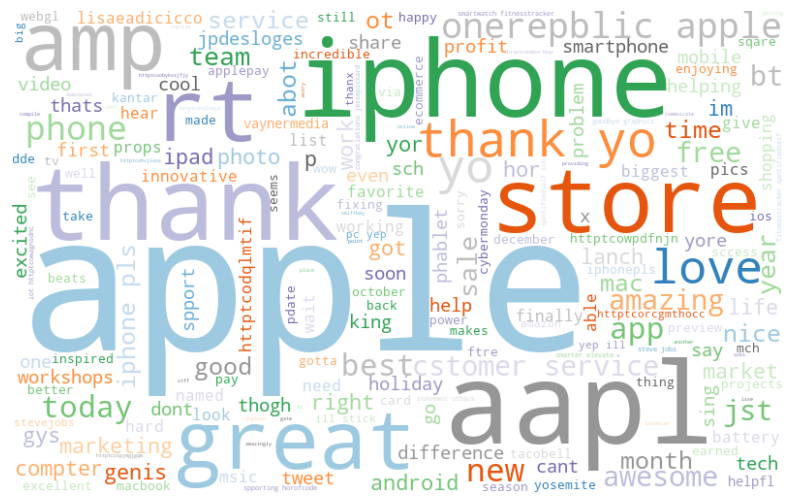

In [106]:
# Filter positive sentiment reviews
positive_reviews = df[df['sentiment'] == 'POSITIVE']['text'].tolist()

# Join all positive reviews into a single string
positive_text = ' '.join(positive_reviews)

# Generate wordcloud
wordcloud = WordCloud(width=800, height=500, background_color='white', max_words=200, colormap='tab20c').generate(positive_text)

# Display wordcloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

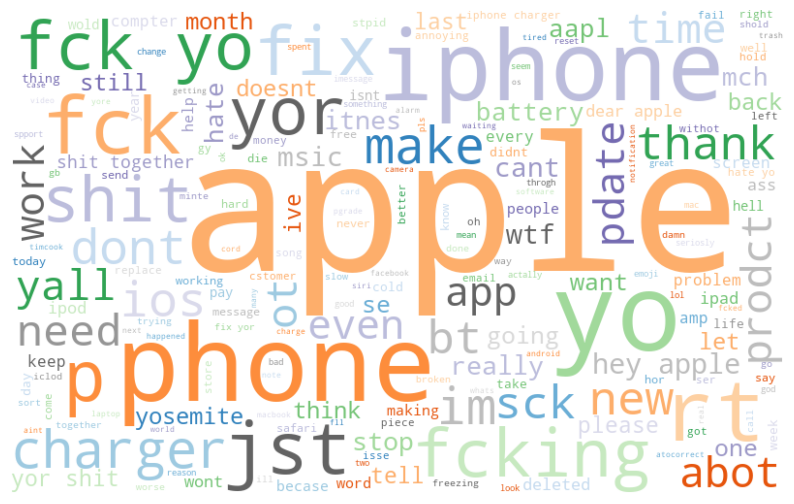

In [107]:
# Filter negative sentiment reviews
negative_reviews = df[df['sentiment'] == 'NEGATIVE']['text'].tolist()

# Join all negative reviews into a single string
negative_text = ' '.join(negative_reviews)

# Generate wordcloud
wordcloud = WordCloud(width=800, height=500, background_color='white', max_words=200, colormap='tab20c').generate(negative_text)

# Display wordcloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

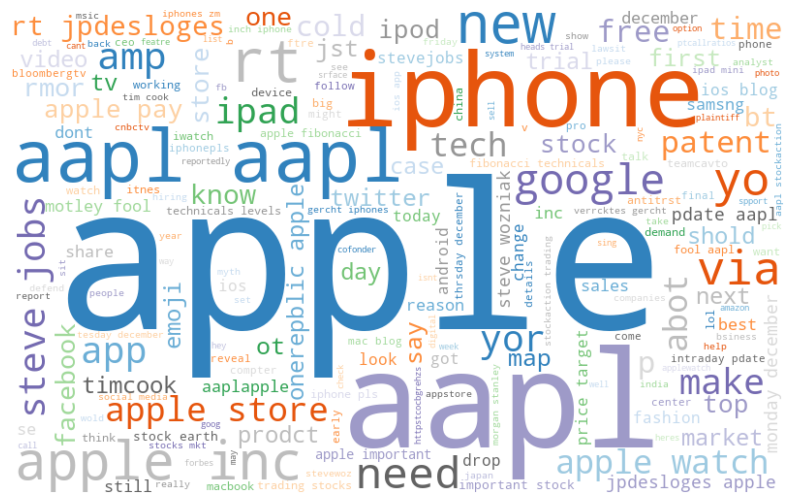

In [108]:
# Filter neutral sentiment reviews
neutral_reviews = df[df['sentiment'] == 'NEUTRAL']['text'].tolist()

# Join all neutral reviews into a single string
neutral_text = ' '.join(neutral_reviews)

# Generate wordcloud
wordcloud = WordCloud(width=800, height=500, background_color='white', max_words=200, colormap='tab20c').generate(neutral_text)

# Display wordcloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Model Building

In [109]:
X = df.drop('sentiment', axis = 1)
y = df['sentiment']

In [110]:

X.shape, y.shape

((1630, 1), (1630,))

### Implementing tf-idf Vectorizer

Class Distribution after SMOTE: Counter({'NEGATIVE': 801, 'NEUTRAL': 801, 'POSITIVE': 801})


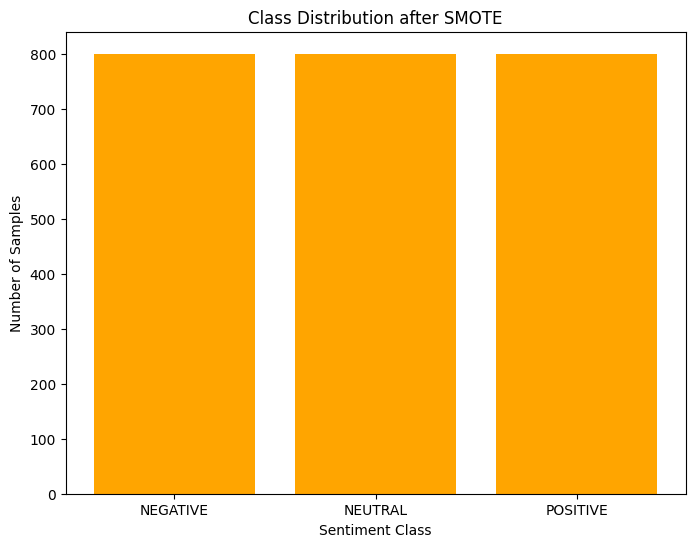

In [111]:
# TF-IDF Text vectorization
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['text'])

# Handle imbalanced classes using SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tfidf, df['sentiment'])

# Print the class distribution after resampling
print("Class Distribution after SMOTE:", Counter(y_resampled))

# Calculate the class distribution after SMOTE
class_distribution = Counter(y_resampled)

# Extract the class labels and their counts
classes = list(class_distribution.keys())
counts = list(class_distribution.values())

# Plot the bar graph
plt.figure(figsize=(8, 6))
plt.bar(classes, counts, color='orange')
plt.xlabel('Sentiment Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution after SMOTE')
plt.show()

In [112]:
## Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

### 1. Logistic Regresssion

In [113]:
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

In [114]:
log_pred = log.predict(X_test)

In [115]:
def evaluation(name, y_test, log_pred):
    cm = confusion_matrix(y_test, log_pred)
    t1 = ConfusionMatrixDisplay(cm)
    print("Classification Report for Logistic Regression: \n")
    print(classification_report(y_test, log_pred))
    t1.plot()

Classification Report for Logistic Regression: 

              precision    recall  f1-score   support

    NEGATIVE       0.90      0.87      0.88       163
     NEUTRAL       0.89      0.88      0.89       155
    POSITIVE       0.94      0.99      0.96       163

    accuracy                           0.91       481
   macro avg       0.91      0.91      0.91       481
weighted avg       0.91      0.91      0.91       481



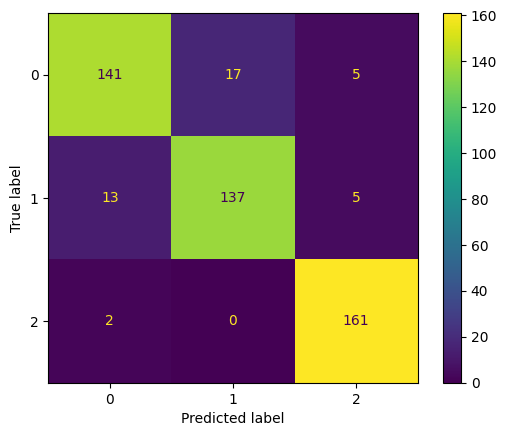

In [116]:
#Visualizing Model Results
evaluation('Classification', y_test, log_pred)

### 2. Naive Bayes

In [117]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [118]:
nb_pred = nb.predict(X_test)

In [119]:
def evaluation(name, y_test, nb_pred):
    cm = confusion_matrix(y_test, nb_pred)
    t1 = ConfusionMatrixDisplay(cm)
    print("Classification Report for Naive Bayes: \n")
    print(classification_report(y_test, nb_pred))
    t1.plot()

Classification Report for Naive Bayes: 

              precision    recall  f1-score   support

    NEGATIVE       0.83      0.88      0.85       163
     NEUTRAL       0.94      0.68      0.79       155
    POSITIVE       0.82      0.99      0.89       163

    accuracy                           0.85       481
   macro avg       0.86      0.85      0.84       481
weighted avg       0.86      0.85      0.85       481



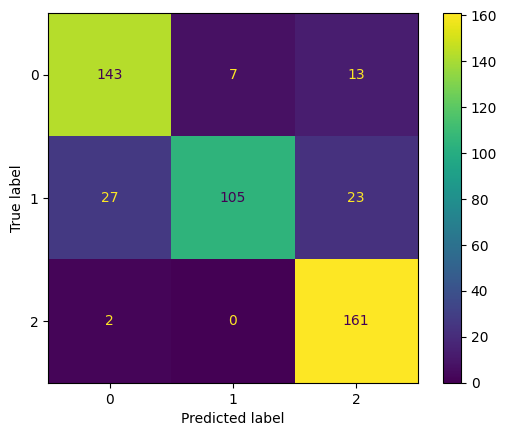

In [120]:
evaluation('Classification', y_test, nb_pred)

### 3. Multi-layer Perceptron

In [121]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation = 'relu', solver = 'adam', max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

In [122]:
mlp_pred = mlp.predict(X_test)

In [123]:
def evaluation(name, y_test, mlp_pred):
    cm = confusion_matrix(y_test, mlp_pred)
    t1 = ConfusionMatrixDisplay(cm)
    print("Classification Report for Multi-layer Perceptron: \n")
    print(classification_report(y_test, mlp_pred))
    t1.plot()

Classification Report for Multi-layer Perceptron: 

              precision    recall  f1-score   support

    NEGATIVE       0.87      0.91      0.89       163
     NEUTRAL       0.92      0.79      0.85       155
    POSITIVE       0.93      1.00      0.96       163

    accuracy                           0.90       481
   macro avg       0.91      0.90      0.90       481
weighted avg       0.91      0.90      0.90       481



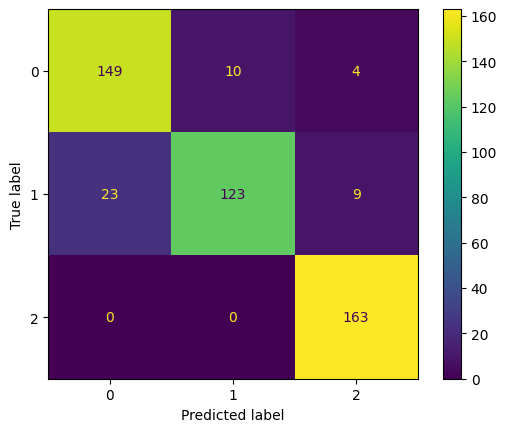

In [124]:
evaluation('Classification', y_test, mlp_pred)

### Save the Model

In [125]:
joblib.dump(log, 'logistic_regression_model.joblib')

['logistic_regression_model.joblib']

### load the saved model

In [126]:
loaded_model = joblib.load('logistic_regression_model.joblib')